# Analýza hlavních komponent

## Úkol

- V datasetu Portland Housing Prices/Sales Jul 2020 - Jul 2021 zjistěte, jestli je zde problém multikolinearity.
- Proveďte analyzu hlavních komponent
- Vytvořte lineární model z PCA a model porovnejte s minulým cvičením

# Načtení dat

In [3]:
import pandas as pd 

In [4]:
data = pd.read_csv ("..\dataset\portland_filtered.csv",  sep=';')

# Analýza
- zobrazte data
- vyřešte NaN hodnoty
- zobrazte základní statistiky dat
- zobrazte korelační matici

# Příprava dat
- vyberte X promenné bathrooms', 'bedrooms', 'livingArea','age','price'
- proměnné standardizujte

# Zobrazte VIF pro každou proměnnou

# PCA
- Proveďte PCA
- zobrazte korelační matici

# Lineární model
- Vytvořte a natrénujte Lineární model pro PCA proměnné
- Zobrazte R2 a RMSE

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Předpokládáme, že data jsou již načtená v proměnné 'data'
# Vyberte si relevantní proměnné pro analýzu (jiné než předtím)
selected_features = ['bathrooms', 'bedrooms', 'livingArea', 'age', 'price']
data_selected = data[selected_features]

# Zobrazte několik prvních řádků pro kontrolu
data_selected.head()


,bathrooms,bedrooms,livingArea,age,price
0,3,5,3470,7,1165000
1,4,5,3374,85,1050000
2,3,3,3265,20,442500
3,3,3,3192,36,765000
4,3,4,3157,73,815000


,bathrooms,bedrooms,livingArea,age,price
count,100.000000,100.000000,100.000000,100.00000,1.000000e+02
mean,2.380000,3.260000,1974.080000,49.88000,5.196074e+05
std,0.838228,0.860115,663.629851,32.77973,1.722241e+05
min,1.000000,1.000000,766.000000,3.00000,1.650000e+05
25%,2.000000,3.000000,1530.000000,20.00000,4.125000e+05
50%,2.000000,3.000000,1859.000000,47.50000,5.000000e+05
75%,3.000000,4.000000,2490.250000,75.25000,5.995312e+05
max,5.000000,6.000000,3470.000000,114.00000,1.165000e+06


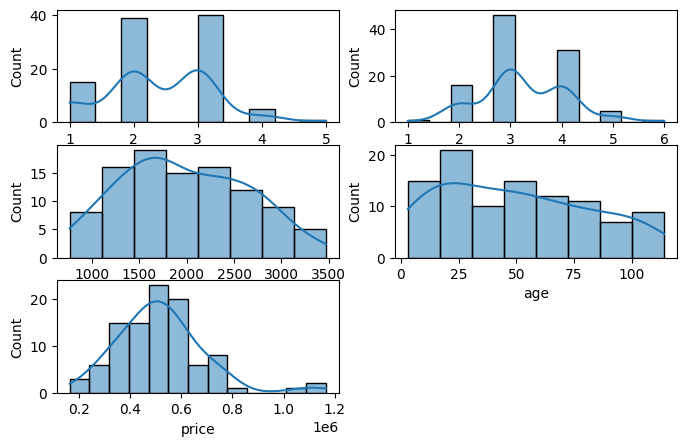

In [6]:
# Distribuce proměnných
fig = plt.figure(figsize=(8, 12))
for pos, feature in enumerate(data_selected.columns, 1):
    ax = fig.add_subplot(7, 2, pos)
    sns.histplot(data_selected[feature], ax=ax, kde=True)

# Základní statistiky
data_selected.describe()


In [7]:
# Kontrola NaN hodnot
nan_values = data_selected.isna().sum()
print("Chybějící hodnoty:")
print(nan_values)

# Předpokládejme, že odstraníme řádky s NaN
data_cleaned = data_selected.dropna()


Chybějící hodnoty:
bathrooms     0
bedrooms      0
livingArea    0
age           0
price         0
dtype: int64


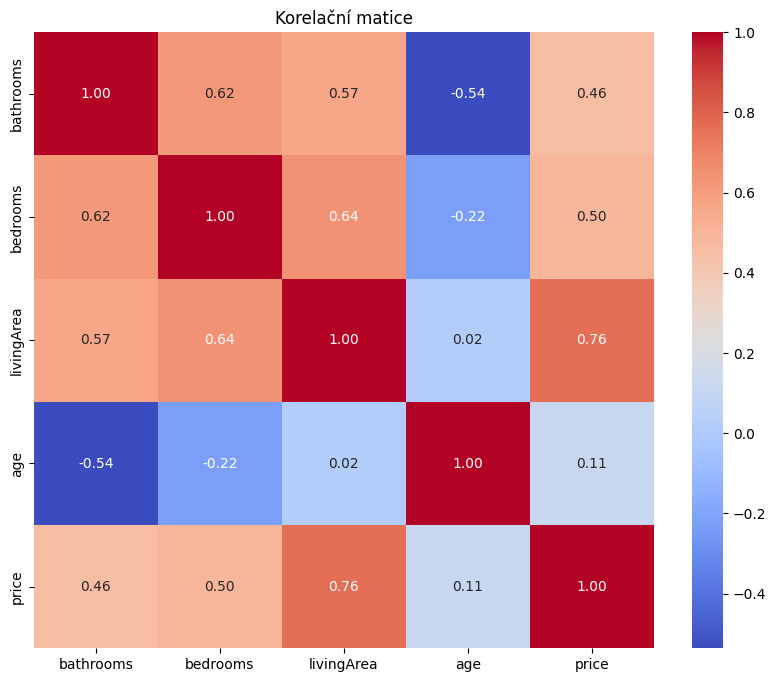

In [8]:
# Korelační matice
corr_matrix = data_cleaned.corr()

# Vykreslení korelační matice
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelační matice')
plt.show()


In [9]:
# Z-standardizace pomocí StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)

# Zobrazte popisnou statistiku po standardizaci
data_std.describe()


,bathrooms,bedrooms,livingArea,age,price
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,9.769963e-17,2.842171e-16,1.398881e-16,-8.215650e-17,7.771561e-17
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.654624e+00,-2.640792e+00,-1.829583e+00,-1.437357e+00,-2.069361e+00
25%,-4.556211e-01,-3.038080e-01,-6.725394e-01,-9.161311e-01,-6.250400e-01
50%,-4.556211e-01,-3.038080e-01,-1.742835e-01,-7.297162e-02,-1.144215e-01
75%,7.433818e-01,8.646843e-01,7.817164e-01,7.778529e-01,4.664071e-01
max,3.141387e+00,3.201669e+00,2.265504e+00,1.965941e+00,3.766279e+00


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Vytvoření matice X (předpovědní proměnné)
X = data_std.drop('price', axis=1)

# Výpočet VIF pro každou proměnnou
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Zobrazení VIF
print(vif_data)


     Features       VIF
0   bathrooms  2.857373
1    bedrooms  2.036889
2  livingArea  2.303777
3         age  1.798314


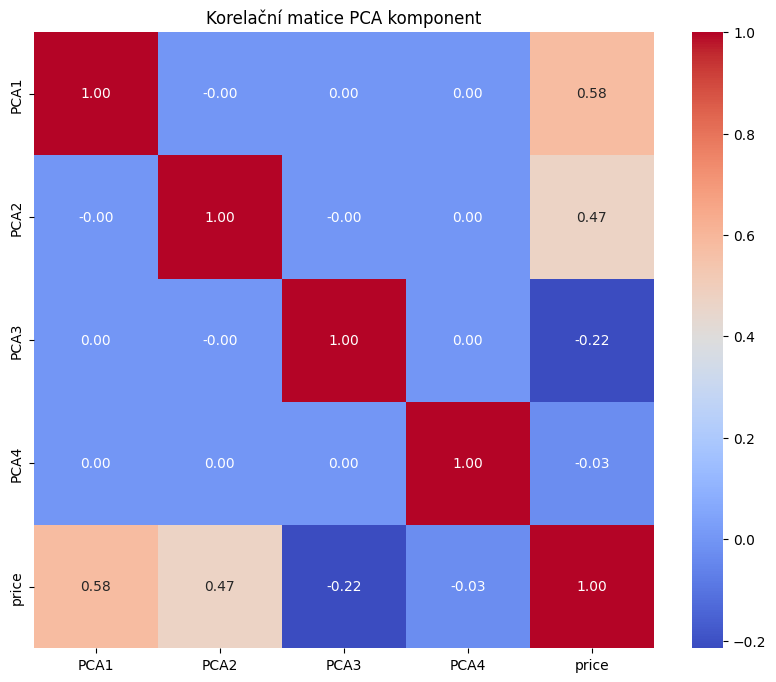

In [12]:
from sklearn.decomposition import PCA

# Provádíme PCA pro 4 komponenty (stejně jako původně)
pca = PCA(n_components=4)
X_pca = pca.fit_transform(data_std.drop('price', axis=1))

# Vytvoření nového datasetu s PCA komponentami
data_pca = pd.DataFrame(X_pca, columns=[f'PCA{i+1}' for i in range(4)])
data_pca['price'] = data_std['price']

# Korelační matice pro PCA komponenty
plt.figure(figsize=(10, 8))
sns.heatmap(data_pca.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelační matice PCA komponent')
plt.show()


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Rozdělení dat na trénovací a testovací
X_pca_data = data_pca.drop('price', axis=1)
y = data_pca['price']
X_train, X_test, y_train, y_test = train_test_split(X_pca_data, y, test_size=0.2, random_state=42)

# Trénování modelu
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predikce na trénovacích datech
y_train_pred = lr.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predikce na testovacích datech
y_test_pred = lr.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Výsledky
print(f"Trénovací R²: {r2_train}")
print(f"Trénovací RMSE: {rmse_train}")
print(f"Testovací R²: {r2_test}")
print(f"Testovací RMSE: {rmse_test}")


Trénovací R²: 0.6381082530567966
Trénovací RMSE: 0.5742795796874621
Testovací R²: 0.44253061412328476
Testovací RMSE: 0.865390838674474
